## 第7章：n-step Bootstrapping（n步自举）

第7章扩展了第6章的时序差分（TD）学习，提出了n步自举方法。这是一种介于单步TD学习（TD(0)）和蒙特卡洛方法之间的折中方案，旨在平衡两者的优点。以下是该章的详细内容：

### 7.1 背景与动机

- **单步TD的局限**：
  - TD(0)只向前看一步，使用 $r_t + \gamma V(s_{t+1})$ 更新当前状态价值，更新速度快但可能因依赖估计值引入偏差。

- **蒙特卡洛的局限**：
  - 蒙特卡洛方法等待整个回合结束，计算完整回报 $G_t$，无偏差但方差高，且无法在线更新。

- **n步自举的目标**：
  - 通过向前看多步（n步）来结合TD和蒙特卡洛的优点：既能利用中间回报减少方差，又能比蒙特卡洛更快更新。

### 7.2 n步回报的定义
- **核心思想**：
  - n步回报（n-step return）是从当前时刻 $t$ 开始，考虑未来n步的实际奖励，再加上第n+1步的价值估计。
  - 数学定义：
    $$G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n V(s_{t+n})$$
    其中：
    - $R_{t+k}$：第 $t+k$ 步的奖励
    - $V(s_{t+n})$：第n步后的状态价值估计
    - $\gamma$：折扣因子

- **与TD(0)和蒙特卡洛的关系**：
  - 当 $n = 1$ 时，$G_{t:t+1} = R_{t+1} + \gamma V(s_{t+1})$，退化为TD(0)。
  - 当 $n \to \infty$（或直到回合结束），$G_{t:t+\infty} = G_t$，退化为蒙特卡洛回报。

- **图示理解**：
  - n步自举是从当前状态向前看n步的"部分回报"，然后用估计值"截断"未来。

### 7.3 n步TD学习
- **更新规则**：
  - 使用n步回报更新价值函数：
    $$V(s_t) \leftarrow V(s_t) + \alpha (G_{t:t+n} - V(s_t))$$
  - 如果 $t+n$ 超过回合终止时刻，则用实际回报截断。

- **伪代码**（n步TD预测）：
  - 初始化 $V(s)$ 为任意值（如0），对所有状态 $s$
  - 重复（每个回合）：
      - 初始化状态 $s，t ← 0$
      - 存储状态和奖励的序列
      - 重复（每个时间步）：
          - 选择动作 a，执行并观察 $R_{t+1}$ 和 $s_{t+1}$
          - 存储 $R_{t+1}$ 和 $s_{t+1}$
          - 如果 t ≥ n：
              - 计算 $G_{t-n:t}$ = $R_{t-n+1}$ + $γ R_{t-n+2}$ + ... + $γ^{n-1}$ $R_t$ + $γ^n V(s_t)$
              - $V(s_{t-n})$ ← $V(s_{t-n})$ + $α (G_{t-n:t}$ - $V(s_{t-n}))$
          - $t ← t + 1$
      - 直到回合结束
      - 处理剩余步骤（$t < n$ 的更新）



- **特点**：
  - 需要存储n步的奖励和状态序列。
  - 延迟更新：必须等待n步后才能更新 $V(s_t)$。

### 7.4 n步SARSA
- **扩展到控制**：
  - n步SARSA将n步自举应用到动作价值函数 $Q(s, a)$，用于在线策略控制。
  - n步回报：
    $$G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n Q(s_{t+n}, a_{t+n})$$
  - 更新规则：
    $$Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha (G_{t:t+n} - Q(s_t, a_t))$$

- **伪代码**（n步SARSA）：
  - 初始化 $Q(s, a)$ 为任意值（如0），对所有状态-动作对 $(s, a)$
  - 重复（每个回合）：
      - 初始化 $s$, 选择 $a$（基于当前策略，如ε-贪婪）
      - $t ← 0$
      - 存储 $s_t$, $a_t$, $R_{t+1}$
      - 重复（每个时间步）：
          - 执行 $a_t$，观察 $R_{t+1}$ 和 $s_{t+1}$
          - 选择 $a_{t+1}$（基于当前策略）
          - 存储 $R_{t+1}$, $s_{t+1}$, $a_{t+1}$
          - 如果 $t ≥ n$：
              - $G_{t-n:t}$ = $R_{t-n+1} + γ R_{t-n+2} + ... + γ^{n-1} R_t + γ^n Q(s_t, a_t)$
              - $Q(s_{t-n}$, $a_{t-n}) ← Q(s_{t-n}, a_{t-n}) + α (G_{t-n:t} - Q(s_{t-n}, a_{t-n}))$
          - $t ← t + 1$
      - 直到回合结束

### 7.5 n步Q-learning（离线策略）
- **定义**：
  - n步Q-learning是离线策略版本，使用n步回报但以最优动作价值截断：
    $$G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n \max_{a} Q(s_{t+n}, a)$$
  - 更新规则同上。

- **与n步SARSA的区别**：
  - SARSA用实际选择的 $a_{t+n}$（在线策略），Q-learning用最大值（离线策略）。

### 7.6 权衡与选择n
- **n的影响**：
  - **小n（如n=1）**：接近TD(0)，低方差但高偏差，更新频繁。
  - **大n（如n=∞）**：接近蒙特卡洛，低偏差但高方差，更新延迟。
  - **中间n**：平衡偏差和方差，可能在特定任务中表现最佳。

- **实验观察**：
  - 书中通过随机游走示例展示了不同n值的性能，表明存在一个最佳n（通常与任务的时间尺度相关）。

### 7.7 与第6章的联系
- **统一框架**：
  - TD(0)是n=1的特例，蒙特卡洛是n=∞的特例。
  - n步自举通过调整n，在TD和蒙特卡洛之间平滑过渡。

- **改进方向**：
  - 第6章的SARSA和Q-learning是单步方法，第7章将其扩展到多步，增加了灵活性。

### 7.8 理论与实践
- **收敛性**：
  - 在适当条件下（如学习率递减、充分探索），n步TD和n步SARSA都能收敛到真实价值或策略。

- **应用**：
  - n步方法适合需要考虑多步回报的任务，如游戏或机器人控制。

- **扩展**：
  - 第7章为后续TD(λ)（第12章）奠定基础，TD(λ)通过指数加权平均整合所有n步回报。


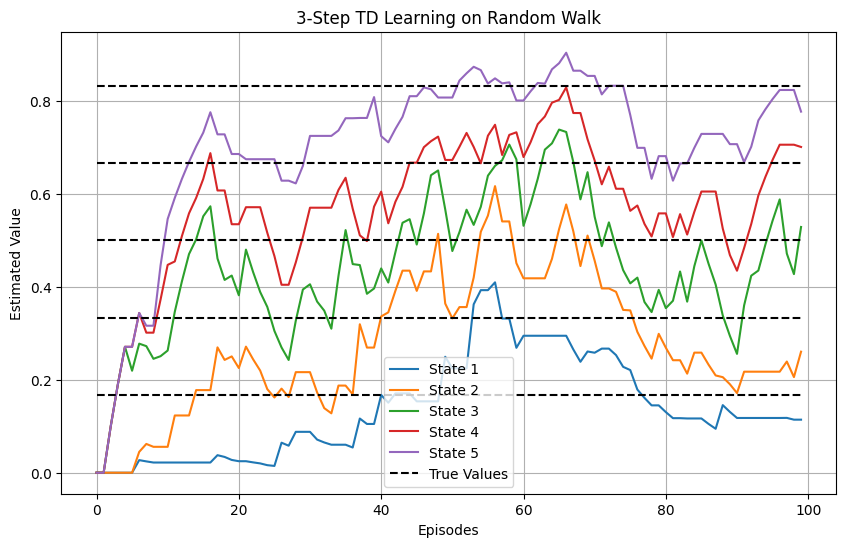

Final Estimated Values: [0.11419147 0.26051307 0.52893306 0.70112311 0.77719908]
True Values: [0.16666667 0.33333333 0.5        0.66666667 0.83333333]


In [1]:
"""
与上一章的随机游走例子所使用的TD(0)方法类似，这里我们使用n步自举方法来估计状态价值函数。我们将实现一个简单的随机游走环境，其中代理在5个状态之间移动，并在到达终止状态时获得奖励。
改成n步自举（n-step Bootstrapping）示例：
"""

import numpy as np
import matplotlib.pyplot as plt

# 参数设置
n_states = 5  # 状态数：A, B, C, D, E (编号1到5)
alpha = 0.1   # 学习率
n_episodes = 100  # 回合数
gamma = 1.0   # 折扣因子
n = 3  # n步自举

# 初始化价值函数
V = np.zeros(n_states + 2)  # 状态编号0和n_states+1为终止状态
true_V = np.array([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1])  # 真实价值

# 记录每次回合后的价值估计
V_history = []

# n步TD学习
np.random.seed(42)  # 固定随机种子以便复现
for episode in range(n_episodes):
    # 初始化状态、奖励和时间步
    state = 3  # 从中间状态C开始
    states = [0] * (n+1)  # 用于存储状态序列，初始用0填充
    states[0] = state    # 设置初始状态
    rewards = [0] * (n+1)  # 用于存储奖励序列

    T = float('inf')  # 终止时间（初始设为无穷大）
    t = 0  # 当前时间步

    # 继续直到所有状态都得到更新
    while True:
        # 如果还没到终止时间，执行一步
        if t < T:
            # 随机选择动作：向左(-1)或向右(+1)
            action = np.random.choice([-1, 1])
            next_state = states[t] + action

            # 检查是否到达终止状态
            if next_state == 0:  # 到达A左侧（终止）
                reward = 0
                T = t + 1  # 设置终止时间
            elif next_state == n_states + 1:  # 到达E右侧（终止）
                reward = 1
                T = t + 1  # 设置终止时间
            else:  # 非终止状态
                reward = 0

            # 记录状态和奖励
            if t + 1 < len(states):
                states[t + 1] = next_state
            else:
                states.append(next_state)

            if t + 1 < len(rewards):
                rewards[t + 1] = reward
            else:
                rewards.append(reward)

        # 更新时间步
        tau = t - n + 1  # n步之前的状态

        # 如果tau对应的状态可以被更新
        if tau >= 0:
            # 计算n步回报
            G = 0
            for i in range(tau + 1, min(tau + n, T) + 1):
                G += gamma**(i - tau - 1) * rewards[i]

            # 如果没有到达终止状态，加上引导值
            if tau + n < T:
                G += gamma**n * V[states[tau + n]]

            # 更新价值函数（只有非终止状态才更新）
            if states[tau] != 0 and states[tau] != n_states + 1:
                V[states[tau]] += alpha * (G - V[states[tau]])

        if tau == T - 1:
            break  # 所有状态都已更新，结束此回合

        t += 1

    # 记录当前的价值估计
    V_history.append(V[1:n_states + 1].copy())

# 可视化结果
plt.figure(figsize=(10, 6))
for i in range(n_states):
    plt.plot([V_history[ep][i] for ep in range(n_episodes)], label=f'State {i+1}')
plt.plot(np.arange(n_episodes), [true_V[1]] * n_episodes, 'k--', label='True Values')
plt.plot(np.arange(n_episodes), [true_V[2]] * n_episodes, 'k--')
plt.plot(np.arange(n_episodes), [true_V[3]] * n_episodes, 'k--')
plt.plot(np.arange(n_episodes), [true_V[4]] * n_episodes, 'k--')
plt.plot(np.arange(n_episodes), [true_V[5]] * n_episodes, 'k--')
plt.xlabel('Episodes')
plt.ylabel('Estimated Value')
plt.title(f'{n}-Step TD Learning on Random Walk')
plt.legend()
plt.grid(True)
plt.show()

# 输出最终估计值与真实值对比
print("Final Estimated Values:", V[1:n_states + 1])
print("True Values:", true_V[1:n_states + 1])